A practical introduction to Pandas
===================

We have been asked to *analyze an otp dataset*, without much more information. This kind of scenario is more common than you might imagine!

## 1) Quickly examine the files in ~/Data/us_dot/otp. What do they contain, in both technical and functional terms? (Use any tool you want)

In [1]:
your_path_to_zips = '/home/dsc/Data/us_dot/otp'
my_path_to_zips = '../../../data/us_dot/otp/'

In [2]:
!ls $my_path_to_zips

On_Time_On_Time_Performance_2015_1.zip	On_Time_On_Time_Performance_2015_5.zip
On_Time_On_Time_Performance_2015_2.zip	On_Time_On_Time_Performance_2015_6.zip
On_Time_On_Time_Performance_2015_3.zip	On_Time_On_Time_Performance_2015_7.zip
On_Time_On_Time_Performance_2015_4.zip	On_Time_On_Time_Performance_2015_8.zip


In [3]:
!unzip --help

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

For this example, we are going to begin using the shell from within this notebook, with the ! notation:

A ! sign before a line tells the notebook to send that line straight away to the underlying OS. 

\* Note that we can substitute python variables into the shell command. We do that by surrounding the name of the variable with curly braces ({}). That's what we are going to do with the `path_to_files` variable

### Check what the files contain

In [4]:
! unzip -l $my_path_to_zips/On_Time_On_Time_Performance_2015_1.zip

Archive:  ../../../data/us_dot/otp//On_Time_On_Time_Performance_2015_1.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
211633432  2015-04-16 20:02   On_Time_On_Time_Performance_2015_1.csv
    12054  2015-04-16 20:02   readme.html
---------                     -------
211645486                     2 files


Oh, it has a readme! Always good to read it.

### Unzip the readme to the current directory

Use the shell

Remember, since the zip file contains several compressed files, we need to specify which one we want.

In [5]:
!unzip -o $my_path_to_zips/On_Time_On_Time_Performance_2015_1.zip readme.html


Archive:  ../../../data/us_dot/otp//On_Time_On_Time_Performance_2015_1.zip
  inflating: readme.html             


### Take a look at the beginning of the readme file

using the shell

In [6]:
!head readme.html

<HTML>
<HEAD>
	<TITLE> readme.html </TITLE>
</HEAD>
<BODY>
	<TABLE><TR><TD COLSPAN=2><H4>BACKGROUND</H4></TD></TR>
	<TR><TD COLSPAN=2>The data contained in the compressed file has been extracted from the 
	On-Time Performance data table of the "On-Time" database from the TranStats data library. 
	The time period is indicated in the name of the compressed file; 
	for example, XXX_XXXXX_2001_1 contains data of the first month of the year 2001. </TD></TR>


The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
(Hint: check out [IPython.display.IFrame](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html))

In [7]:
from IPython.display import IFrame
IFrame('readme.html', 800, 600)

That's some very good documentation!

### Summary: 

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

In [8]:
filename = 'On_Time_On_Time_Performance_2015_1'

!unzip -o $my_path_to_zips/{filename}.zip {filename}.csv

Archive:  ../../../data/us_dot/otp//On_Time_On_Time_Performance_2015_1.zip
  inflating: On_Time_On_Time_Performance_2015_1.csv  


In [9]:
!head -n 2 On_Time_On_Time_Performance_2015_1.csv

"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","UniqueCarrier","AirlineID","Carrier","TailNum","FlightNum","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivActualElapsedTime","DivArrDelay","DivDistance","Div1Airport","Div1A

Pretty unreadable, so we go for a tool designed specifically for tabular data: **pandas**

### Load some of the data (one of the files) into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out zipfile.ZipFile

First, open a connection to one of the files

In [10]:
readme = open('readme.html')
readme

<_io.TextIOWrapper name='readme.html' mode='r' encoding='UTF-8'>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [12]:
from zipfile import ZipFile

my_zip_file = ZipFile(my_path_to_zips + filename + '.zip')

zip_file is a connection to the compressed file, the .zip. We can use it to open a connection to one of the files it contains, which will behave like a normal uncompressed file that we had opened with open()

In [13]:
my_csv_file = my_zip_file.open(filename + '.csv')

Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [14]:
f = open('./914310910_T_T100_SEGMENT_ALL_CARRIER_ReadMe.csv')

Remember that as a file's contents are read into memory, the file is 'consumed'.

In [15]:
f.readlines()
f.readline()

''

You can reset the read position with the `seek` method in file-like objects.

In [16]:
f.seek(0)
f.readline()

'"SYS_FIELD_NAME"," FIELD_DESC",\n'

In [17]:
df = pd.read_csv(my_csv_file)
df.head()

/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2015,1,1,1,4,2015-01-01,AA,19805,AA,N787AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,2,5,2015-01-02,AA,19805,AA,N795AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,3,6,2015-01-03,AA,19805,AA,N788AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,7,2015-01-04,AA,19805,AA,N791AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,5,1,2015-01-05,AA,19805,AA,N783AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's start examining the data: show the beginning of the file. How many records does it contain?

In [18]:
df.shape

(469968, 110)

## Trimming the data

The table is quite wide, and it seems that there are many columns without much data. Which, exactly, are those? (let's consider empty a column that doesn't contain at least 1000 records, arbitrarily)

In [19]:
mask = df.count() > 1000

not_that_empty_columns = df.columns[mask]

df2 = df[not_that_empty_columns]
df2.shape

(469968, 71)

It seems that the "diverted" fields, after the first, are often empty. No big surprise, since not that many flights must be diverted more than once in a month. Let's drop those columns, since we are not that interested in those, at least for now.

In [20]:
df.notnull().sum()

Year                  469968
Quarter               469968
Month                 469968
DayofMonth            469968
DayOfWeek             469968
FlightDate            469968
UniqueCarrier         469968
AirlineID             469968
Carrier               469968
TailNum               467186
FlightNum             469968
OriginAirportID       469968
OriginAirportSeqID    469968
OriginCityMarketID    469968
Origin                469968
OriginCityName        469968
OriginState           469968
OriginStateFips       469968
OriginStateName       469968
OriginWac             469968
DestAirportID         469968
DestAirportSeqID      469968
DestCityMarketID      469968
Dest                  469968
DestCityName          469968
DestState             469968
DestStateFips         469968
DestStateName         469968
DestWac               469968
CRSDepTime            469968
                       ...  
Div2WheelsOn              27
Div2TotalGTime            27
Div2LongestGTime          27
Div2WheelsOff 

We could also do this with `drop`, either generating a mask with `count` or using the `thresh` parameter.

In [21]:
inverse_mask = df.count() <= 1000
pretty_empty_columns = df.columns[inverse_mask]
df3 = df.drop(pretty_empty_columns, axis=1)

In [22]:
df2.equals(df3)

True

Now that we have eliminated some inconvenient data columns, let's have a look at the rest: let's loook at how the location data is encoded.


#### Exercise:

First, generate a list of the columns that have 'Origin' in their name

Second, show a sample of the values that those columns take.

Hint: we are going to use the str attribute of Series and Indexes


In [23]:
del(df)
del(df2)

In [24]:
origin_col_names = df3.columns.str.contains('Origin')
origin_cols = df3.columns[origin_col_names]

df3[origin_cols].sample(5)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
194140,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41
11610,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85
386192,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82
12311,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74
345366,14679,1467903,33570,SAN,"San Diego, CA",CA,6,California,91


So much redundant information!

## Fast forward

Just taking out the redundant columns would take a while, so let's jump ahead with this list of interesting columns:

In [25]:
columns_of_interest = ['FlightDate', 'DayOfWeek', 'Carrier', 'TailNum', 'FlightNum', 'Origin', 
         'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName',
         'DepTime', 'DepDelay', 'AirTime', 'Distance']

len(columns_of_interest)

15

In [26]:
df4 = df3[columns_of_interest]
df4.shape

(469968, 15)

## Formatting columns and parsing dates and times

Hurray! we have almost cleaned our dataset. Soon we will begin to do some actual work with it. 

Pandas interpreted the Deptime column as ints and the FlighDate column as strings. We want to combine them and parse them into a DateTime column, so that we can use them properly as datetimes.

In [27]:
df4.sample(5)

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance
228070,2015-01-30,5,WN,N770SA,321,BWI,"Baltimore, MD",Maryland,MHT,"Manchester, NH",New Hampshire,715.0,-5.0,57.0,377.0
71231,2015-01-22,4,B6,N556JB,1453,FLL,"Fort Lauderdale, FL",Florida,SJU,"San Juan, PR",Puerto Rico,1447.0,-2.0,121.0,1046.0
462913,2015-01-25,7,EV,N13123,4320,TUL,"Tulsa, OK",Oklahoma,IAH,"Houston, TX",Texas,1830.0,6.0,69.0,429.0
50385,2015-01-22,4,AS,N309AS,774,SEA,"Seattle, WA",Washington,TPA,"Tampa, FL",Florida,917.0,42.0,294.0,2520.0
113738,2015-01-19,1,DL,N947DN,1737,DTW,"Detroit, MI",Michigan,BWI,"Baltimore, MD",Maryland,711.0,-3.0,63.0,409.0


In [28]:
pd.to_datetime(2018.0)

Timestamp('1970-01-01 00:00:00.000002018')

First step:

#### Exercise

Define a function that will parse our int hours into a reasonable format ("HH:MM"). It should take only one int hour and return the appropriate representation.

In [29]:
pd.to_datetime('2018-01-03 14:22')

Timestamp('2018-01-03 14:22:00')

In [30]:
def float_to_timestring(input_float):
    if np.isnan(input_float):
        input_float = 0.0
    
    minutes = input_float % 100
    hours = (input_float // 100) % 24
    
    string_representation = '%.2d:%.2d' % (hours, minutes)
    
    return string_representation
    
print(float_to_timestring(855.0))
print(float_to_timestring(1855.0))
print(float_to_timestring(2217.0))
print(float_to_timestring(np.nan))
print(float_to_timestring(2400.0))

08:55
18:55
22:17
00:00
00:00


In [31]:
'%s de %d es %.4f' % ('tocoto', 4.12389712938, 4.12389712938)

'tocoto de 4 es 4.1239'

Now, we can use that function to build datetime strings that we will then pass to pd.to_datetime, with a format we will specify. Let's do that

Hint: Check out [pd.to_datetime's documentatoin](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) for info on the acceptable format.

In [32]:
deptime_strings = df4['DepTime'].apply(float_to_timestring)
datetime_strings = df4['FlightDate'] + ' ' + deptime_strings
datetime_strings.head()

0    2015-01-01 08:55
1    2015-01-02 08:50
2    2015-01-03 08:53
3    2015-01-04 08:53
4    2015-01-05 08:53
dtype: object

In [33]:
df4['DepDateTime'] = pd.to_datetime(datetime_strings)
df4.dtypes

/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


FlightDate                 object
DayOfWeek                   int64
Carrier                    object
TailNum                    object
FlightNum                   int64
Origin                     object
OriginCityName             object
OriginStateName            object
Dest                       object
DestCityName               object
DestStateName              object
DepTime                   float64
DepDelay                  float64
AirTime                   float64
Distance                  float64
DepDateTime        datetime64[ns]
dtype: object

In [34]:
df4['DepDateTime'].apply(lambda dt: dt.hour).head()

0    8
1    8
2    8
3    8
4    8
Name: DepDateTime, dtype: int64

#### Exercise

Overwrite the 'DepTime' column with its version in the proper format

Hint: Before overwriting your column in the dataframe, make sure that everything works by assigning the modified column to a Series variable.

#### Exercise

Now, create a DepDateTime with the proper type using `pd.to_datetime`

### Inspect the types, see if everything is in order

In [35]:
df4.dtypes

FlightDate                 object
DayOfWeek                   int64
Carrier                    object
TailNum                    object
FlightNum                   int64
Origin                     object
OriginCityName             object
OriginStateName            object
Dest                       object
DestCityName               object
DestStateName              object
DepTime                   float64
DepDelay                  float64
AirTime                   float64
Distance                  float64
DepDateTime        datetime64[ns]
dtype: object

## Examining the data

Finally clean! Let's start to do some preliminary work on the data.

#### Exercise:

Find the biggest delays. 

How would you find the 5 maximum delays?

In [36]:
df4['DepDelay'].sort_values(ascending=False).head(5)

21523     1988.0
11524     1604.0
18198     1551.0
108152    1457.0
26001     1450.0
Name: DepDelay, dtype: float64

In [44]:
df4.sort_values(by='DepDelay', ascending=False).head(5)

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepDateTime
21523,2015-01-23,5,AA,N598AA,1322,BHM,"Birmingham, AL",Alabama,DFW,"Dallas/Fort Worth, TX",Texas,1608.0,1988.0,99.0,597.0,2015-01-23 16:08:00
11524,2015-01-18,7,AA,N5DGAA,224,LAS,"Las Vegas, NV",Nevada,LAX,"Los Angeles, CA",California,1414.0,1604.0,42.0,236.0,2015-01-18 14:14:00
18198,2015-01-27,2,AA,N586AA,1242,FAT,"Fresno, CA",California,DFW,"Dallas/Fort Worth, TX",Texas,850.0,1551.0,155.0,1313.0,2015-01-27 08:50:00
108152,2015-01-21,3,AA,N4XNAA,2385,JAX,"Jacksonville, FL",Florida,DFW,"Dallas/Fort Worth, TX",Texas,1240.0,1457.0,144.0,918.0,2015-01-21 12:40:00
26001,2015-01-11,7,AA,N469AA,1595,AUS,"Austin, TX",Texas,DFW,"Dallas/Fort Worth, TX",Texas,700.0,1450.0,37.0,190.0,2015-01-11 07:00:00


#### Exercise

What was the average delay for this month? Standard deviation and typical value?

In [38]:
df4['DepDelay'].describe()[['mean', 'std', '50%']]

mean     9.759471
std     36.636491
50%     -2.000000
Name: DepDelay, dtype: float64

We can also do it like this but it's much more inefficient

In [39]:
# df4.mean()['DepDelay']

Also: a quick look at the correlation between the numerical variables is extremely easy with pandas:

In [40]:
df4.corr()

,DayOfWeek,FlightNum,DepTime,DepDelay,AirTime,Distance
DayOfWeek,1.000000,0.016484,0.014525,0.017254,0.027161,0.021530
FlightNum,0.016484,1.000000,0.002301,0.024760,-0.335150,-0.349912
DepTime,0.014525,0.002301,1.000000,0.177239,-0.027934,-0.019962
DepDelay,0.017254,0.024760,0.177239,1.000000,0.013282,0.013871
AirTime,0.027161,-0.335150,-0.027934,0.013282,1.000000,0.981376
Distance,0.021530,-0.349912,-0.019962,0.013871,0.981376,1.000000


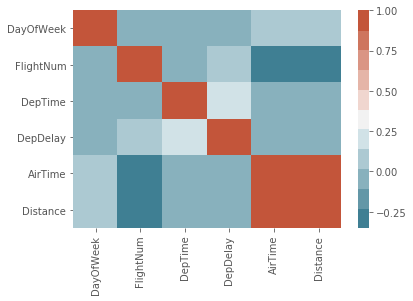

In [41]:
import seaborn as sns


sns.heatmap(df4.corr(), cmap=sns.diverging_palette(220,20,n=11))

#### Exercise

What is the plane that has the highest average delay? We'll first group by tail number (the *license plate* of a plane) and then calculate the relevant statistic for each group (group of *departures*)

In [52]:
delays_per_plane = df4.groupby('TailNum')['DepDelay'].mean()

delays_per_plane.sort_values(ascending=False).head(1)

TailNum
N79011    232.0
Name: DepDelay, dtype: float64

In [56]:
delays_per_plane.sort_values(ascending=False).head(10)

TailNum
N79011    232.000000
N228UA    217.500000
N707DN    204.000000
N651UA    167.000000
N776UA    159.000000
N660UA    150.500000
N116UA    129.000000
N780UA    119.000000
N398AA    118.733333
N76065    117.416667
Name: DepDelay, dtype: float64

Oh, but those numbers smell like these planes had only a few, very delayed, departures! how can we count the number of departures *and* calculate the average delay at the same time?

In [71]:
delay_stats_per_plane = df4.groupby('TailNum')['DepDelay'].agg(['mean', 'count'])
delay_stats_per_plane.sort_values(by='mean', ascending=False)

,mean,count
TailNum,,
N79011,232.000000,2
N228UA,217.500000,2
N707DN,204.000000,2
N651UA,167.000000,4
N776UA,159.000000,2
N660UA,150.500000,2
N116UA,129.000000,2
N780UA,119.000000,2
N398AA,118.733333,15


Awesome! now, let's look at the average delay of the planes with some departures (let's say, at least 15)

In [72]:
mask = delay_stats_per_plane['count'] >= 15

delay_stats_per_plane[mask].sort_values(by='mean', ascending=False)

,mean,count
TailNum,,
N398AA,118.733333,15
N5FSAA,105.800000,15
N557AA,85.434783,23
N12125,67.235294,34
N189DN,65.800000,20
N619AS,62.125000,16
N639AA,60.312500,16
N502MQ,59.769231,52
N17128,52.666667,36


#### Exercise: 

Show cities by descending number of airports

In [77]:
airports_per_city = df4.groupby('OriginCityName')['Origin'].nunique()

airports_per_city.sort_values(ascending=False)

OriginCityName
Houston, TX                       2
Chicago, IL                       2
New York, NY                      2
Washington, DC                    2
Fayetteville, NC                  1
Flagstaff, AZ                     1
Flint, MI                         1
Fort Lauderdale, FL               1
Fort Myers, FL                    1
Fort Smith, AR                    1
Yuma, AZ                          1
Fresno, CA                        1
Gainesville, FL                   1
Garden City, KS                   1
Gillette, WY                      1
Grand Forks, ND                   1
Grand Island, NE                  1
Grand Junction, CO                1
Grand Rapids, MI                  1
Fort Wayne, IN                    1
Fayetteville, AR                  1
Green Bay, WI                     1
Eau Claire, WI                    1
Devils Lake, ND                   1
Dickinson, ND                     1
Dothan, AL                        1
Dubuque, IA                       1
Duluth, MN   

## Plotting

There are several ways in which we could go about plotting this dataset in order to get acquainted with it. 

For example, do the delays have a relationship with the number of departures a plane does?

#### Exercise

Do a scatter plot with matplotlib. Check the documentation

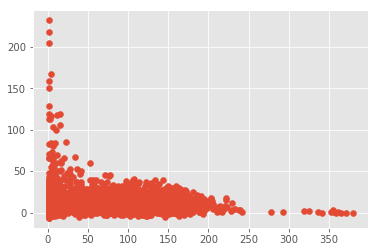

In [78]:
plt.scatter(delay_stats_per_plane['count'], delay_stats_per_plane['mean'])

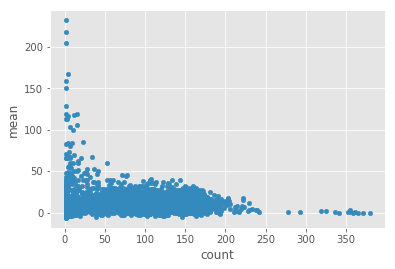

In [80]:
delay_stats_per_plane.plot.scatter('count','mean')

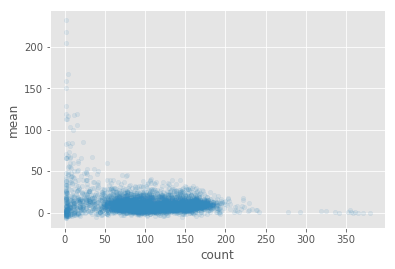

In [83]:
delay_stats_per_plane.plot.scatter('count','mean', alpha=.1)

Pretty impossible to see anything in there. Maybe a different kind of plottting is required:

(-5, 50)

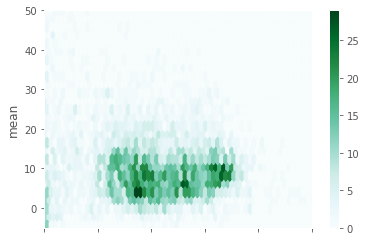

In [86]:
ax = delay_stats_per_plane.plot.hexbin('count', 'mean')
ax.set_xlim(0,250)
ax.set_ylim(-5,50)

#### Exercise:

Plot the distribution of delays as a histogram, both with a linear and a logarithmic scale

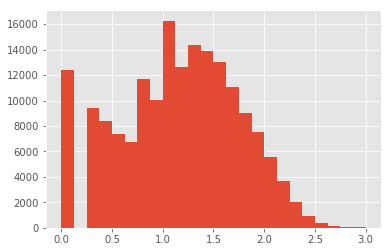

In [101]:
delays = df4['DepDelay'][df4['DepDelay']>0]

np.log10(delays).hist(bins=np.linspace(0,3, 25))

### Another question:

how do the delays stack over the course of the day? We are going to look at it by plotting the distribution of delays for each hour of the day. The very best way to compare distributions side by side is a boxplot, so we'll use that.

We need to provide `plt.boxplot()` with a sequence that contains 24 elements. Each of those will be a sequence containing every individual delay for one hour of the day. We'll need, therefore, to extract hours of the day for each departure and group based on that.

In [105]:
from datetime import datetime

dt = datetime(2018, 1, 26, 18, 31, 47)

dt.hour

18

In [107]:
df4.head(5)

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepDateTime
0,2015-01-01,4,AA,N787AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,855.0,-5.0,378.0,2475.0,2015-01-01 08:55:00
1,2015-01-02,5,AA,N795AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,850.0,-10.0,357.0,2475.0,2015-01-02 08:50:00
2,2015-01-03,6,AA,N788AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,853.0,-7.0,330.0,2475.0,2015-01-03 08:53:00
3,2015-01-04,7,AA,N791AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,853.0,-7.0,352.0,2475.0,2015-01-04 08:53:00
4,2015-01-05,1,AA,N783AA,1,JFK,"New York, NY",New York,LAX,"Los Angeles, CA",California,853.0,-7.0,338.0,2475.0,2015-01-05 08:53:00


In [109]:
hours = df4['DepDateTime'].apply(lambda dt: dt.hour)
delays = df4['DepDelay']

### Everything looks ok! let's plot this thing!

(-20, 150)

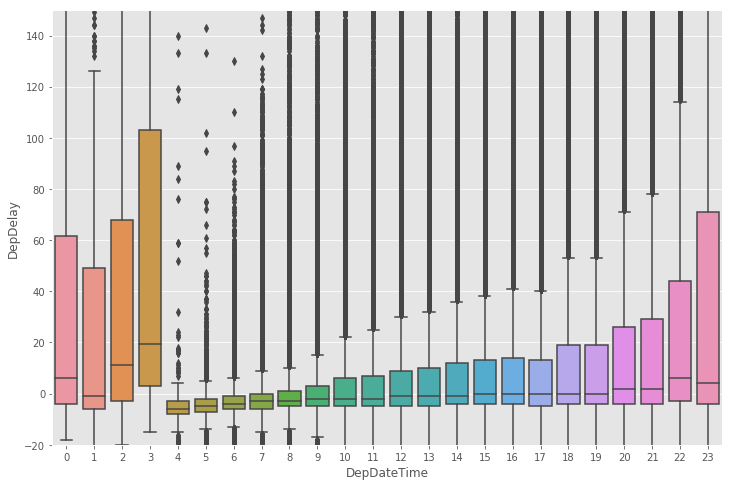

In [115]:
f = plt.figure()
f.set_size_inches(12,8)
ax = sns.boxplot(x=hours, y=delays)
ax.set_ylim(-20,150)